In [2]:
import csv, datetime, pandas as pd

# Read data for January 1

In [3]:
file = 'C:\\Users\\vaibhav\\Documents\\UVA\\Summer\\Project\\Code\\Vaibhav\\HoneypotCSV\\2018-01-01-mhn.csv'

parse_dates = ['timestamp']
data = pd.read_csv(file, parse_dates = parse_dates, date_parser = lambda x: datetime.datetime.fromtimestamp(float(x)))
pd.to_datetime(data['timestamp'])
print(data.shape)

(3453, 12)


Finding out unique sources

In [4]:
unique_src = data.src.unique()
print(len(unique_src))

996


Unique ip sources frequency table

In [5]:
df = data.groupby('src').size().reset_index(name='Count').rename(columns={'src':'Unique src'}).sort_values('Count', ascending = False)
print(df.head())

        Unique src  Count
452  185.107.94.10    374
622   207.38.90.73    346
900    77.72.82.72    316
972   93.115.26.45    144
714  222.72.41.178     96


In [6]:
df = data.groupby('app').size().reset_index(name='Count').rename(columns={'app':'Unique app'}).sort_values('Count', ascending = False)
print(df)

  Unique app  Count
1    dionaea   3193
0       amun    260


Grouping by timestamp

In [7]:
df = data.groupby('timestamp').size().reset_index(name='Count')
print(df.head())

            timestamp  Count
0 2017-12-31 06:53:22      1
1 2017-12-31 06:54:22      1
2 2017-12-31 06:55:02      1
3 2017-12-31 06:55:12      2
4 2017-12-31 06:55:42      1


In [8]:
time_series = data.groupby(data.timestamp.dt.hour).size().reset_index(name='Count').rename(columns={'timestamp':'Hour'})
print(time_series)

    Hour  Count
0      0    125
1      1    202
2      2    105
3      3     99
4      4     97
5      5     95
6      6    113
7      7    170
8      8    164
9      9    159
10    10    143
11    11    217
12    12    166
13    13    162
14    14    140
15    15    157
16    16    146
17    17    120
18    18    137
19    19    107
20    20    134
21    21    135
22    22    235
23    23    125


## Bar chart of time stamp count

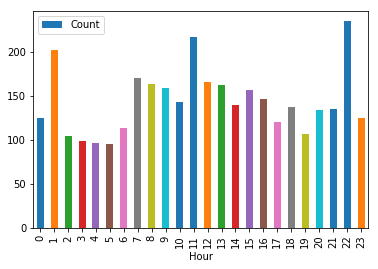

In [10]:
time_series.plot(kind='bar', x = 'Hour', y = 'Count')